load dataset


In [20]:
import pandas as pd


In [21]:
#load dataset
df= pd.read_csv(r"C:\Users\NSPIRA\Desktop\StudentsPerformance.csv")

In [22]:
#displays rows
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Explore the dataset here[information and stats derived]

In [26]:
#to check shape and column types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [27]:
#to display basic stats
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [28]:
#to check for missing values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Data visualization(EDA)

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

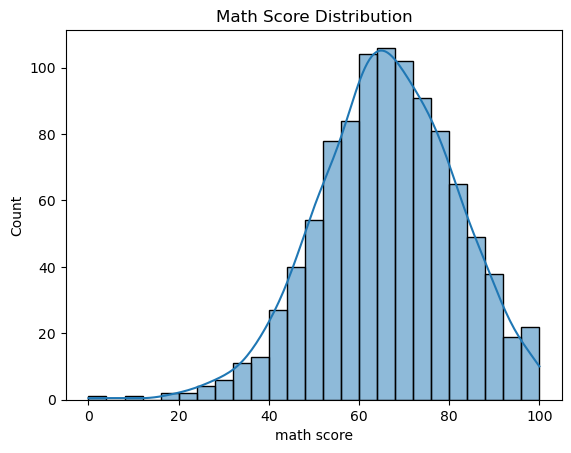

In [31]:
#visualize math score in graph
sns.histplot(df['math score'], kde=True)
plt.title('Math Score Distribution')
plt.show()

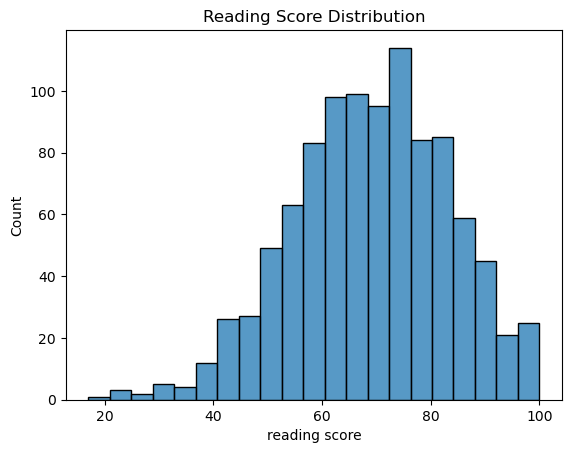

In [32]:
#graph for reading score
sns.histplot(df['reading score'])
plt.title('Reading Score Distribution')
plt.show()

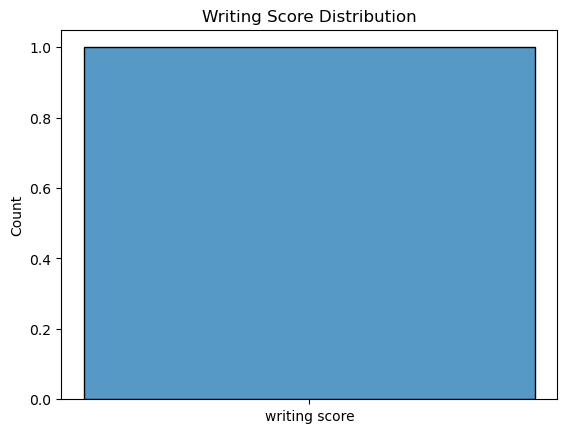

In [34]:
#graph writing score
sns.histplot(['writing score'])
plt.title('Writing Score Distribution')
plt.show()

In [53]:
#df["average score"] = (df["math score"] + df["reading score"] + df["writing score"])/3
#df.head()


CONVERTING CATEGORICAL COLUMNS

In [55]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,math score,reading score,writing score,average score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72,72,74,72.666667,False,True,False,False,False,True,False,False,False,False,True,True
1,69,90,88,82.333333,False,False,True,False,False,False,False,False,True,False,True,False
2,90,95,93,92.666667,False,True,False,False,False,False,False,True,False,False,True,True
3,47,57,44,49.333333,True,False,False,False,False,False,False,False,False,False,False,True
4,76,78,75,76.333333,True,False,True,False,False,False,False,False,True,False,True,True


Splitting data

In [71]:
# Use reading and writing scores to help predict math score
X = df.drop(["math score", "average score"], axis=1)  # Keep reading & writing scores
y = df["math score"]  # Predicting math score


# One-hot encode categoricals
X = pd.get_dummies(X, drop_first=True)

# Split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, r2_score
y_pred = rf_model.predict(X_test)

print("Random Forest MSE:", mean_squared_error(y_test, y_pred))
print("Random Forest R² Score:", r2_score(y_test, y_pred))


Random Forest MSE: 36.69565650921202
Random Forest R² Score: 0.8491990721184489


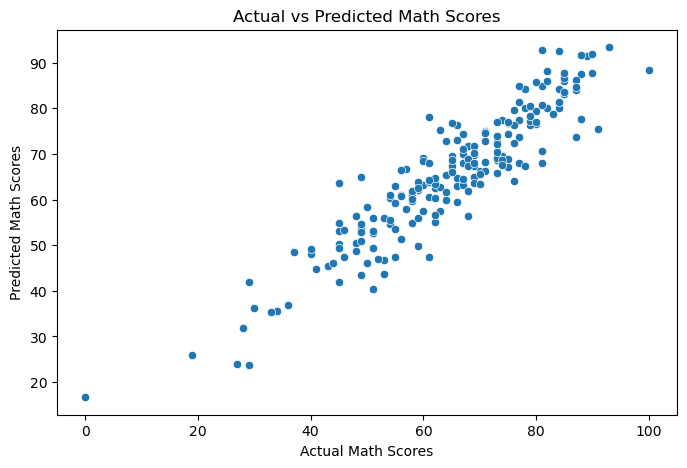

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Math Scores")
plt.ylabel("Predicted Math Scores")
plt.title("Actual vs Predicted Math Scores")
plt.show()


Testing


In [73]:

test_student = {
    'reading score': 85,
    'writing score': 90,
    'gender': 'female',
    'race/ethnicity': 'group B',
    'parental level of education': "bachelor's degree",
    'lunch': 'standard',
    'test preparation course': 'completed'
}

# Convert to DataFrame
test_df = pd.DataFrame([test_student])

# One-hot encode the same way as training
test_encoded = pd.get_dummies(test_df, drop_first=True)

# Align the columns to match training data
test_encoded = test_encoded.reindex(columns=X.columns, fill_value=0)

# Predict
predicted_math_score = rf_model.predict(test_encoded)

# Show result
print(f"🎯 Predicted Math Score for Test Student: {predicted_math_score[0]:.2f}")


🎯 Predicted Math Score for Test Student: 77.14
